In [0]:
# Digit Recognizer python.3
# -*- coding: utf-8 -*-
# @Time    : 5/10/2019 
# @Author  : Zhancheng Gan
# @File    : Kannada_MNIST.py
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Convolution2D
from keras.optimizers import Adam, RMSprop
from keras.metrics import categorical_accuracy
from keras import regularizers

import tensorflow.compat.v1 as tf

import numpy as np
import random
import pandas as pd
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

#connect google drive
from google.colab import drive
drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#load data
data_path = 'drive/My Drive/Machine_Learning/Kannada-MNIST.zip'
from zipfile import ZipFile

zf = ZipFile(data_path)
zf.printdir()

train = pd.read_csv(zf.open('train.csv'))
test = pd.read_csv(zf.open('test.csv'))
train.head()

File Name                                             Modified             Size
Dig-MNIST.csv                                  2019-09-16 22:42:16     18401187
sample_submission.csv                          2019-09-16 22:42:18        33899
test.csv                                       2019-09-16 22:42:18      8667163
train.csv                                      2019-09-16 22:42:18    104748945


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
Y_train = train['label']

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)
Y_train.value_counts()

test = test.drop(labels=["id"], axis=1)

In [0]:
# Check for null and missing values
X_train.isnull().any().describe()
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [0]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [0]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [0]:
from sklearn.model_selection import train_test_split
# Split the train and the validation set for the fitting
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.2, random_state=1211)

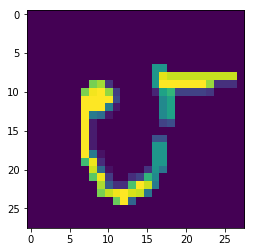

In [0]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [0]:
batch_size = 64
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)
train_data = datagen.flow(X_train,Y_train, batch_size=batch_size)
validation_data = (X_validation, Y_validation)

In [0]:
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu',padding = 'Same',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu',padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


#add flatten layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# model.summary()

#Set optimizer
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=True)
RMSprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
#model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[categorical_accuracy])








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
#add callback function
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

tbCallBack = TensorBoard(log_dir='log',histogram_freq=0,write_graph=True,write_images=False)
checkpoint = ModelCheckpoint(filepath='drive/My Drive/Machine_Learning/best_aptos_model.hdf5',save_best_only='True',monitor='val_loss')
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)

callback = [tbCallBack,checkpoint,earlyStop,reduce_lr]


In [0]:
history = model.fit_generator(
        train_data,
        verbose=1, 
        epochs=200,
        validation_data=validation_data,
        callbacks=callback 
) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
750/750 [==============================] - 27s 36ms/step - loss: 0.2776 - categorical_accuracy: 0.9073 - val_loss: 0.0377 - val_categorical_accuracy: 0.9897
Epoch 2/200
750/750 [==============================] - 23s 30ms/step - loss: 0.0633 - categorical_accuracy: 0.9826 - val_loss: 0.0353 - val_categorical_accuracy: 0.9916
Epoch 3/200
750/750 [==============================] - 23s 31ms/step - loss: 0.0468 - categorical_accuracy: 0.9868 - val_loss: 0.0274 - val_categorical_accuracy: 0.9928
Epoch 4/200
750/750 [==============================] - 23s 30ms/step - loss: 0.0390 - categorical_accuracy: 0.9890 - val_loss: 0.0187 - val_categorical_accuracy: 0.9951
Epoch 5/200
750/750 [==============================] - 23s 31ms/step - loss: 0.0384 - categorical_accuracy: 0.9894 - val_loss: 0.0189 - val_categorical_accuracy: 0.9946
Epoch 6/200
750/750 [==============================] - 23s 

In [0]:
# Model evaluation
# load the best model just saved
model.load_weights('drive/My Drive/Machine_Learning/best_aptos_model.hdf5')
loss_and_metrics = model.evaluate(x=X_validation, y=Y_validation)
# print out the test result
print('Test loss:{}\nTest accuracy:{}'.format(loss_and_metrics[0], loss_and_metrics[1]))

12000/12000 [==============================] - 2s 150us/step
Test loss:0.011589528390325237
Test accuracy:0.9961666666666666


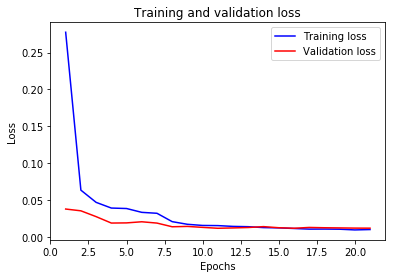

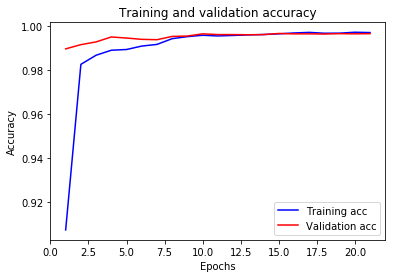

In [0]:
# model result visualization
history_dict = history.history

#plot the visualizations
import matplotlib.pyplot as plt

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf() 

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
from tqdm import tqdm
tta_steps = 10
predictions = []

for i in tqdm(range(tta_steps)):
    preds = model.predict(test)
    predictions.append(preds)

pred = np.mean(predictions, axis=0)
# predict results
#results = model.predict(test)
# select the indix with the maximum probability
results = np.argmax(pred,axis = 1)

100%|██████████| 10/10 [00:05<00:00,  1.73it/s]


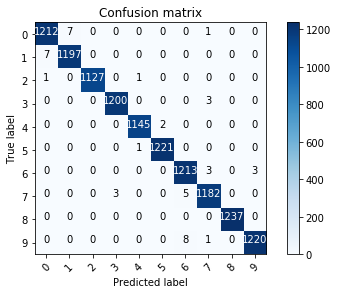

In [0]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_validation)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_validation,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

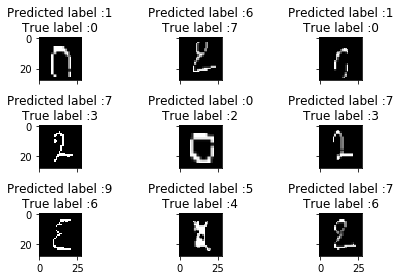

In [0]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_validation[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)), cmap = 'gray', interpolation = 'none')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    plt.tight_layout()

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-9:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


In [0]:
sample = pd.read_csv(zf.open('sample_submission.csv'))
sample.label = results.astype(int)
sample.to_csv("drive/My Drive/Machine_Learning/submission.csv", index=False)